<a href="https://colab.research.google.com/github/RCaminero/artificial-lntelligence/blob/main/analysis_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive # We use that for use our content in drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/House_Rent_Dataset.csv')
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


#**REFERENCES OF DATA**

**BHK:** Number of Bedrooms, Hall, Kitchen.

**Rent:** Price of the Houses/Apartments/Flats.

**Size:** Size of the Houses/Apartments/Flats in Square Feet.

**Floor:** Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

**Area Type:** Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

**Area Locality:** Locality of the Houses/Apartments/Flats.

**City:** City where the Houses/Apartments/Flats are Located.

**Furnishing Status:** Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

**Tenant Preferred:** Type of Tenant Preferred by the Owner or Agent.
Bathroom: Number of Bathrooms.

**Point of Contact:** Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [ ]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [ ]:
df.drop(columns='Posted On', inplace = True)

In [ ]:
objects = df.select_dtypes(include='object').columns
for i in range(0,len(objects)):
    print(df[objects[i]].value_counts())
    print('*************************************************')

In [ ]:
le = preprocessing.LabelEncoder()

for i in range(0,len(objects)):
    df[objects[i]] = le.fit_transform(df[objects[i]])
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,455,2,221,4,2,1,2,2
1,2,20000,800,14,2,1527,4,1,1,1,2
2,2,17000,1000,14,2,1760,4,1,1,1,2
3,2,10000,800,10,2,526,4,2,1,1,2
4,2,7500,850,10,1,1890,4,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,271,1,219,3,1,1,2,2
4742,3,29000,2000,16,2,1214,3,1,1,3,2
4743,3,35000,1750,271,1,724,3,1,1,3,0
4744,3,45000,1500,226,1,590,3,1,2,2,0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


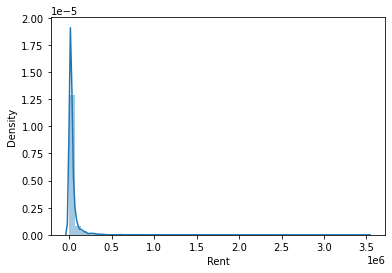

In [ ]:
sns.distplot(df['Rent'])

In [ ]:
df.drop(df[(df['Rent'] > 100000)].index, inplace=True)
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,455,2,221,4,2,1,2,2
1,2,20000,800,14,2,1527,4,1,1,1,2
2,2,17000,1000,14,2,1760,4,1,1,1,2
3,2,10000,800,10,2,526,4,2,1,1,2
4,2,7500,850,10,1,1890,4,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,271,1,219,3,1,1,2,2
4742,3,29000,2000,16,2,1214,3,1,1,3,2
4743,3,35000,1750,271,1,724,3,1,1,3,0
4744,3,45000,1500,226,1,590,3,1,2,2,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


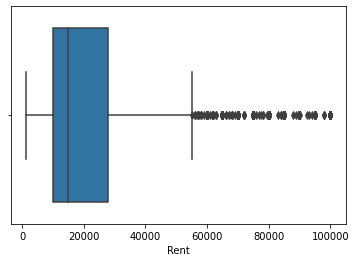

In [ ]:
sns.boxplot(df['Rent'])

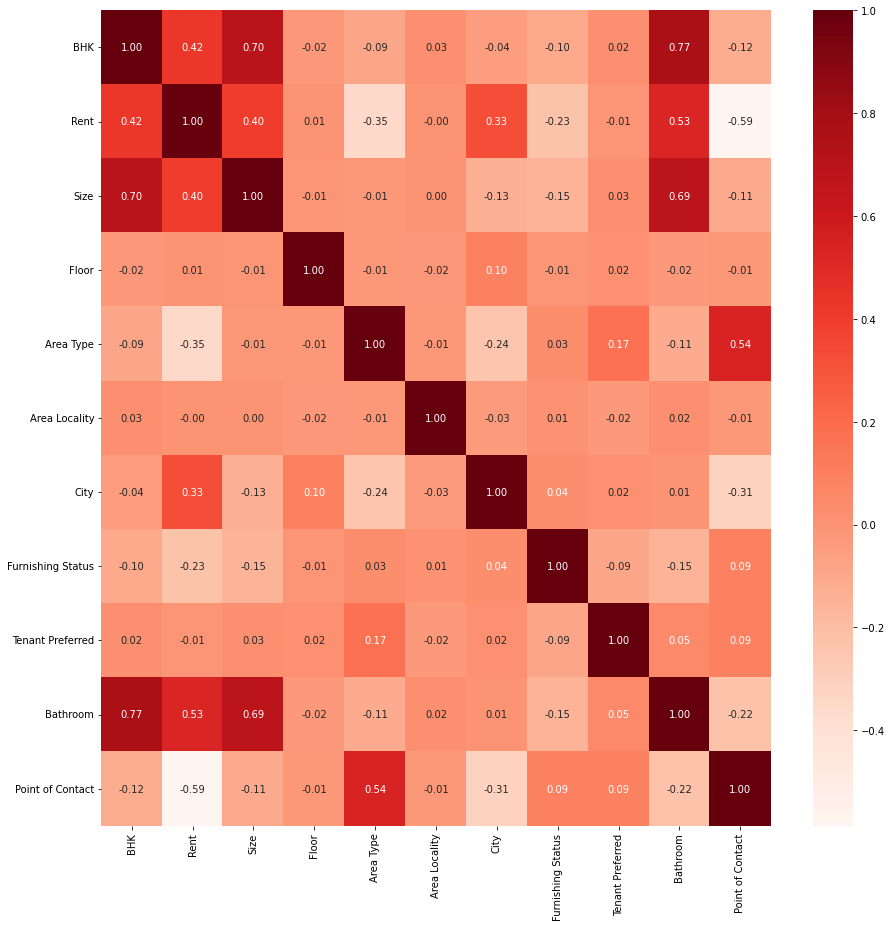

In [ ]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')
plt.show()

In [ ]:
X = df.drop(columns=['Rent'])
y = df['Rent']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=44, shuffle =True)

In [ ]:
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,455,2,221,4,2,1,2,2
1,2,20000,800,14,2,1527,4,1,1,1,2
2,2,17000,1000,14,2,1760,4,1,1,1,2
3,2,10000,800,10,2,526,4,2,1,1,2
4,2,7500,850,10,1,1890,4,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,271,1,219,3,1,1,2,2
4742,3,29000,2000,16,2,1214,3,1,1,3,2
4743,3,35000,1750,271,1,724,3,1,1,3,0
4744,3,45000,1500,226,1,590,3,1,2,2,0


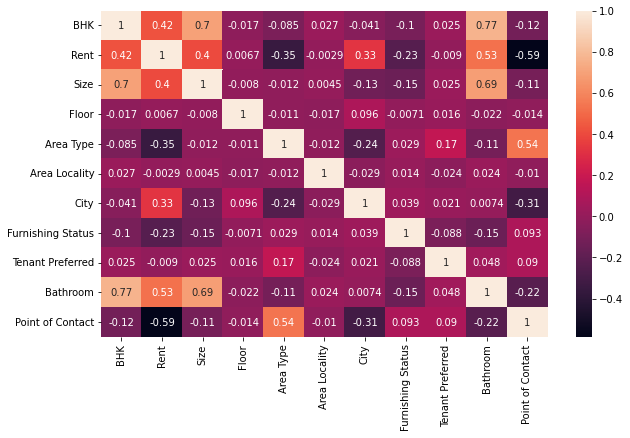

In [ ]:
corr = df.corr()
plt.subplots(figsize=(10,6))
sns.heatmap(corr, vmax = 1,square = False,annot=True)
plt.show()

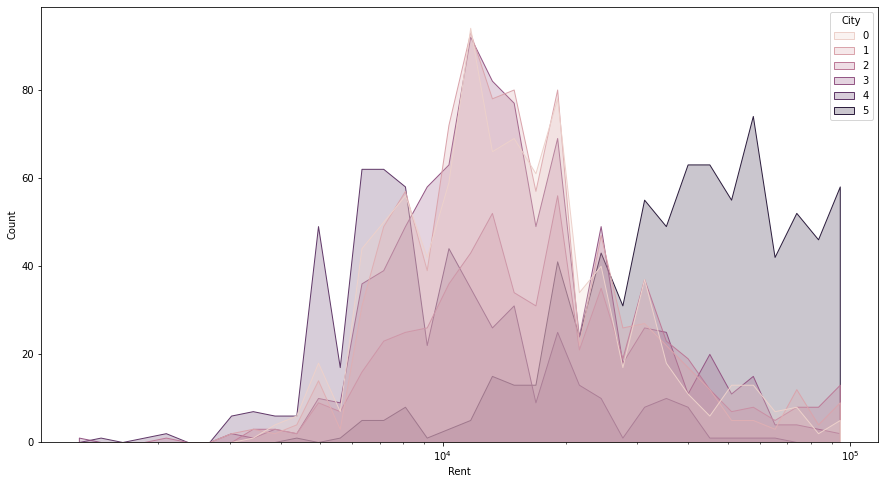

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x="Rent", log_scale=True, hue="City", element="poly")

In [ ]:
bathroom_df = df.groupby('Bathroom')['Rent'].mean().sort_values(ascending=False).round(2)
bathroom_df

Bathroom
4    61753.85
5    60100.00
6    52500.00
7    47500.00
3    41312.75
2    23155.81
1    11862.16
Name: Rent, dtype: float64

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
city_df = df['City'].value_counts()
city_df

1    875
0    866
3    854
5    766
2    582
4    523
Name: City, dtype: int64

In [ ]:
fig = px.bar(city_df, x=city_df.index, y=city_df.values, color=city_df.index, 
       title='Number of House in Each City which is Available for Rent', text=city_df.values)
fig.update_traces(width=0.3)
fig.update_layout(
    xaxis_title="City",
    yaxis_title="Count",
    font = dict(size=17))
fig.show()

In [ ]:
fig = px.bar(bathroom_df, x=bathroom_df.index, y=bathroom_df.values, color=bathroom_df.index, 
            title='Avg rent by bathroom available', text=bathroom_df.values)
fig.update_traces(width=0.3)
fig.update_layout(
    xaxis_title="Bathroom",
    yaxis_title="Average House rent",
    font = dict(size=17))

fig.show()

In [ ]:
fig = px.scatter(df, x='Size', y='Rent', color='BHK', size='Size', hover_data=['Rent'])
fig.update_layout(title='House Rents vs House Sizes',
                  yaxis_zeroline=False, xaxis_zeroline=False)
fig.show()

In [ ]:
furnishing_df = df['Furnishing Status'].value_counts()
furnishing_df

1    2097
2    1771
0     598
Name: Furnishing Status, dtype: int64

In [ ]:
fig = px.bar(furnishing_df, x=furnishing_df.index, y=furnishing_df.values, color=furnishing_df.index, 
       title='Types of Furnishing Status', text=furnishing_df.values)
fig.update_traces(width=0.3)
fig.update_layout(
    xaxis_title="Furnishing Status",
    yaxis_title="Count",
    font = dict(size=17))
fig.show()

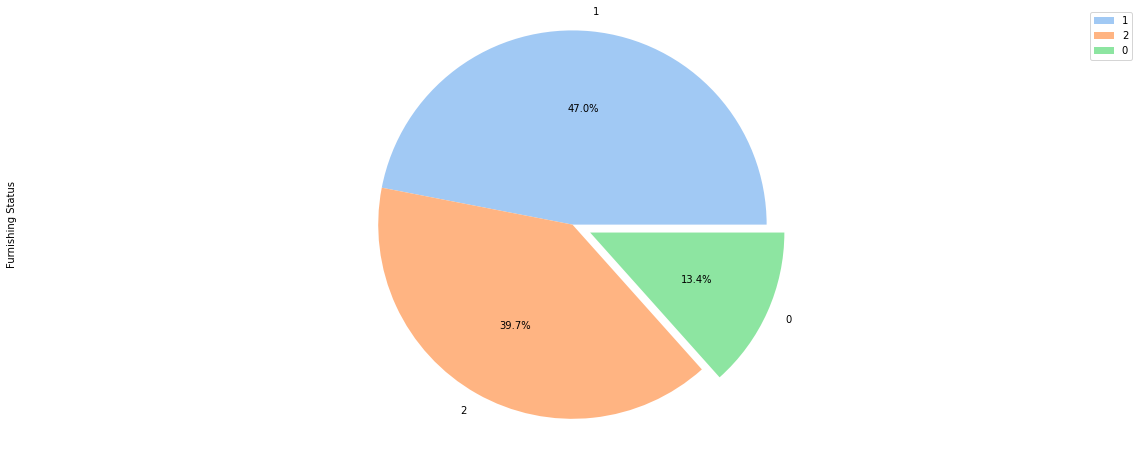

In [ ]:
plt.figure(figsize = (20, 8))
explode = (0, 0, 0.1)
colors = sns.color_palette('pastel')[0:5]
furnishing_df.plot(kind = 'pie',
            colors = colors,
            explode = explode,
            autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = furnishing_df.index, loc = "best")
plt.show()

In [ ]:
tenant_df = df['Tenant Preferred'].value_counts()
tenant_df

1    3268
0     780
2     418
Name: Tenant Preferred, dtype: int64

In [ ]:
fig = px.bar(tenant_df, x=tenant_df.index, y=tenant_df.values, color=tenant_df.index, 
            title='Types of Tenant Preferred', text=tenant_df.values)
fig.update_traces(width=0.3)
fig.update_layout(
    xaxis_title="Tenant Preferred",
    yaxis_title="Count",
    font = dict(size=17))

fig.show()